In [1]:

from dtype.datasets import *
from dtype.sorters.rule_sorter.rule_sorter import RuleSorter
from dtype.sorters import *
from dtype.metrics import *
from utils.drawer import *

### Подсчет всех метрик для всех комбинаций сортировок и датасетов

In [ ]:
datasets ={ "ExampleDataset":ExampleDataset(),
           "PUPlaynet":PuplayNet(),
           
          }
sorters ={ 
          "Слева-Направо Сверху Вниз" : RuleSorter(),
          "XYCut" : XYCut()
          
          }
metrics = {
    "FullMatchPrecision":FullMatchPrecision(),
    "BLEU": BLEU(),
    "ARD" : ARD()

}

for name_sorter, sorter in sorters.items():
    print("="*10, name_sorter, "="*10)
    for name_dataset, dataset in datasets.items():
        print("*"*5, name_dataset, "*"*5)
        for name_metric, metric in metrics.items():
            print(name_metric, f':\t{metric.compute(dataset, sorter):.4f}')

========== Слева-Направо Сверху Вниз ==========
***** ExampleDataset *****
FullMatchPrecision :	0.0000
BLEU :	0.5146
ARD :	3.0000
***** PUPlaynet *****
FullMatchPrecision :	0.1750
BLEU :	0.4740
ARD :	20.5000
========== XYCut ==========
***** ExampleDataset *****
FullMatchPrecision :	1.0000
BLEU :	1.0000
ARD :	0.0000
***** PUPlaynet *****
FullMatchPrecision :	0.9050


### Конкретный пример

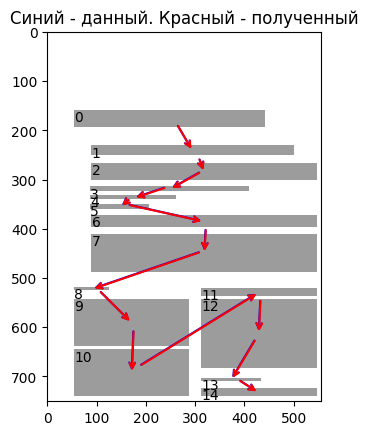

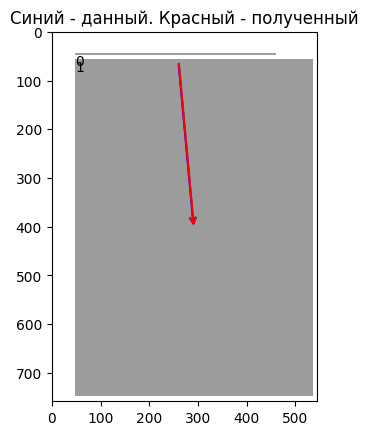

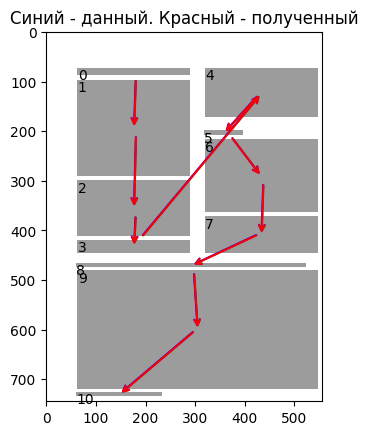

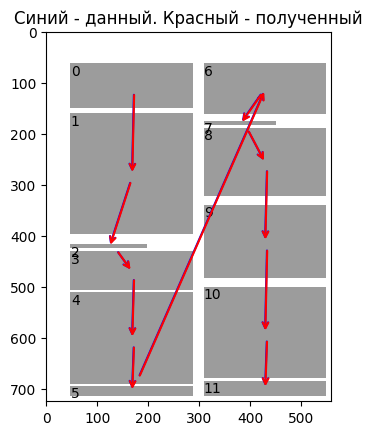

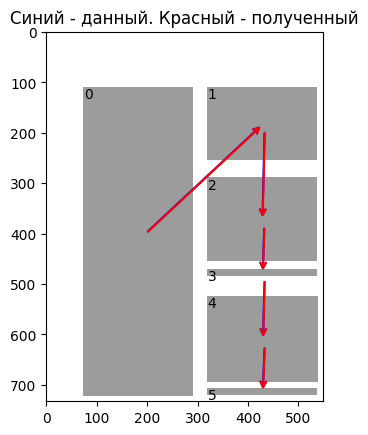

In [3]:
pages = datasets["PUPlaynet"].pages[3:8]
sorter = sorters["XYCUT"]
for page in pages:
    inds = sorter.sort(page)


    Drawer.draw_with_arrows(page, pred_read=inds)
